# import lib

In [4]:
import pandas
import psycopg2
import configparser

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


# connect to db

In [5]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [20]:
cur=conn.cursor()

# q1

In [207]:
q1_sql = """
        select * from gp29.student
        """

In [208]:
cur.execute(q1_sql)

In [209]:
conn.commit()

In [210]:
df = pandas.read_sql_query(q1_sql,conn)
df[:]

,s_email,s_name,s_major
0,abc@jmu.edu,abc,analysis
1,def@jmu.edu,def,biology
2,ghi@jmu.edu,ghi,chemistry
3,jkl@jmu.edu,jkl,english


# q2

In [201]:
q2_sql= """
                select gp29.professor.p_name, gp29.course.c_name
                from gp29.professor
                inner join gp29.course
                on gp29.professor.p_email = gp29.course.p_email
                """

In [202]:
cur.execute(q2_sql)

In [203]:
conn.commit()

In [204]:
df = pandas.read_sql_query(q2_sql,conn)
df[:]

,p_name,c_name
0,orthandrew danzell,national_security
1,noel hendrickson\n,analysis
2,timothy walton,terrorism
3,stephen marrin,class
4,stephen marrin,data mining
5,new,new_class
6,new,new_class


# q3

In [16]:
q3_sql= """
               select c_number, count (*) as num_enrolled
               from gp29.enroll_list
               group by c_number
               order by num_enrolled desc
                """

In [206]:
cur.execute(q3_sql)

In [198]:
conn.commit()

In [18]:
df = pandas.read_sql_query(q3_sql,conn)
df[:]

,c_number,num_enrolled
0,111,3
1,333,3
2,444,2
3,222,2


<AxesSubplot:xlabel='c_number'>

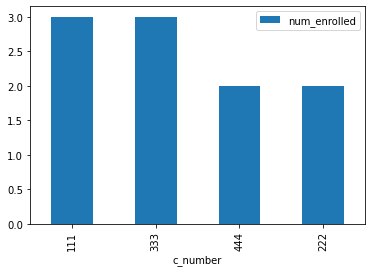

In [19]:
df.plot.bar(x='c_number',y='num_enrolled')

# q4

In [12]:
q4_sql= """
              select gp29.professor.p_name,
                  count (*) as num_teaching
              from gp29.professor
              inner join gp29.course
              on gp29.professor.p_email = gp29.course.p_email
              group by gp29.professor.p_name
              order by num_teaching desc
                  
                """

In [193]:
cur.execute(q4_sql)

In [194]:
conn.commit()

In [14]:
df = pandas.read_sql_query(q4_sql,conn)
df[:]

,p_name,num_teaching
0,new,4
1,stephen marrin,2
2,timothy walton,1
3,noel hendrickson\n,1


<AxesSubplot:xlabel='p_name'>

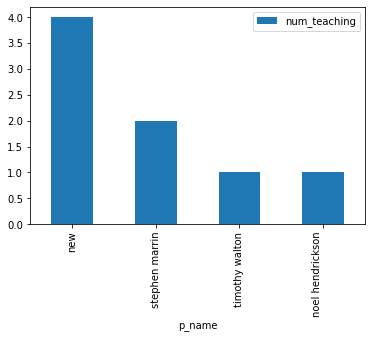

In [15]:
df.plot.bar(x='p_name',y='num_teaching')

# q5

In [275]:
q5_sql= """
            insert into gp29.professor(p_email,p_name,p_office)
            values ('{}','{}','{}')  
                  
                """.format('new4@jmu.edu','new','9')
print(q5_sql)


            insert into gp29.professor(p_email,p_name,p_office)
            values ('new4@jmu.edu','new','9')  
                  
                


In [276]:
cur.execute(q5_sql)

In [286]:
conn.commit()

In [278]:
df = pandas.read_sql_query("select * from gp29.professor",conn)
df[:]

,p_email,p_name,p_office
0,hendrinx@jmu.edu\n,noel hendrickson\n,engo1204\n
1,waltontr@jmu.edu\n,timothy walton,isat326
2,danzelox@jmu.edu,orthandrew danzell,isat1207
3,marrin@jmu.edu,stephen marrin,isat100
4,new@jmu.edu,new,9
5,new3@jmu.edu,new,9
6,new4@jmu.edu,new,9


In [290]:
q5_sql= """
            insert into gp29.course (c_number,c_name,c_room,p_email)
            values ('{}','{}','{}','{}')  
                  
                """.format('102','new_class','121','new4@jmu.edu')
print(q5_sql)


            insert into gp29.course (c_number,c_name,c_room,p_email)
            values ('102','new_class','121','new4@jmu.edu')  
                  
                


In [291]:
cur.execute(q5_sql)

In [292]:
conn.commit()

In [293]:
df = pandas.read_sql_query("select * from gp29.course",conn)
df[:]

,c_number,c_name,c_room,p_email
0,444,national_security,44,danzelox@jmu.edu
1,333,analysis,33,hendrinx@jmu.edu\n
2,222,terrorism,22,waltontr@jmu.edu\n
3,555,class,145,marrin@jmu.edu
4,111,data mining,11,marrin@jmu.edu
5,777,new_class,121,new@jmu.edu
6,999,new_class,121,new3@jmu.edu
7,102,new_class,121,new4@jmu.edu


# q6

In [1]:
q6_sql= """
           update gp29.course
           set p_email = '{}'  
            where p_email = '{}'
                  
                """.format('new4@jmu.edu','danzelox@jmu.edu')
print(q6_sql)


           update gp29.course
           set p_email = 'new4@jmu.edu'  
            where p_email = 'danzelox@jmu.edu'
                  
                


In [308]:
cur.execute(q6_sql)

In [310]:
conn.commit()

In [315]:
df = pandas.read_sql_query("select * from gp29.course",conn)
df[:]

,c_number,c_name,c_room,p_email
0,333,analysis,33,hendrinx@jmu.edu\n
1,222,terrorism,22,waltontr@jmu.edu\n
2,555,class,145,marrin@jmu.edu
3,111,data mining,11,marrin@jmu.edu
4,777,new_class,121,new@jmu.edu
5,999,new_class,121,new3@jmu.edu
6,102,new_class,121,new4@jmu.edu
7,444,national_security,44,new4@jmu.edu


In [312]:
q6_sql= """
           delete from gp29.professor
           where p_email = '{}'
                  
                """.format('danzelox@jmu.edu')
print(q6_sql)


           delete from gp29.professor
           where p_email = 'danzelox@jmu.edu'
                  
                


In [313]:
cur.execute(q6_sql)

In [314]:
conn.commit()

In [316]:
df = pandas.read_sql_query("select * from gp29.professor",conn)
df[:]

,p_email,p_name,p_office
0,hendrinx@jmu.edu\n,noel hendrickson\n,engo1204\n
1,waltontr@jmu.edu\n,timothy walton,isat326
2,marrin@jmu.edu,stephen marrin,isat100
3,new@jmu.edu,new,9
4,new3@jmu.edu,new,9
5,new4@jmu.edu,new,9


In [317]:
cur.close()

In [319]:
conn.close()